In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display
pd.options.display.max_columns = None

# Regression - Introduction

## Exercise 1: housing regression

### 1.1

Using the *housing.csv* file, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [2]:
# exercise 1.1

housing = pd.read_csv('../data/housing.csv')

# simplest model including all significant features
# INDUS and AGE removed
X = housing[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']] 
X = sm.add_constant(X)

est = sm.OLS(housing.PRICE, X).fit()
est.summary()

# this model has a moderate R^2 and could probably be improved

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.73e-135
Time:                        17:05:36   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4517      4.903      8.454      0.000      31.818      51.086
CRIM          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
ZN             0.0462      0.014      3.378      0.001       0.019       0.073
CHAS           2.8719      0.863      3.329      0.001       1.177       4.567
NOX          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
RM             3.6730      0.409      8.978      0.000       2.869       4.477
DIS           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
RAD            0.2839      0.064      4.440      0.000       0.158       0.410
TAX           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
PTRATIO       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
LSTAT         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

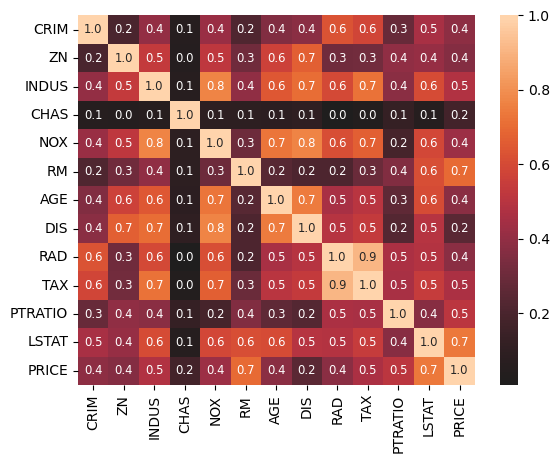

In [3]:
corr = housing.corr()
sns.heatmap(abs(corr), center=0, annot=True, fmt='.1f', annot_kws={'fontsize':'small'})

# can see in the correlation matrix that multicollinearity is an issue with some featues, RAD:TAX and DIS:NOX in particular
# the condition number also indicates multicollinearity
# this means the model could have limited interpretability

### Exercise 1.2: Polynomial features

Use polynomial features to improve your regression model in `exercise 1.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [4]:
# build easier to use R formula from PolynomialFeatures
def to_formula(poly_features, no_interactions=False):
    names = pd.DataFrame(poly_features.get_feature_names_out())[0]
    formula = ''
    if no_interactions:
        for name in names:
            if '^' in name:
                name = f'I({name})'
            if " " not in name:
                formula = formula + f'{name.replace("^", "**")} + '
    else:
        for name in names:
            interaction_list = name.split(" ")
            for i in range(len(interaction_list)):
                if '^' in interaction_list[i]:
                    interaction_list[i] = f'I({interaction_list[i]})'
            interaction_list = ":".join(interaction_list)
            formula = formula + f'{interaction_list.replace("^", "**")} + '
    formula = formula[:-3]
    return formula

In [5]:
# exercise 1.2

# fit a polynomial model including squared and cubed features

X_ = housing[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_)

features = to_formula(poly, no_interactions=True)
formula = f'PRICE ~ {features} + RAD:TAX + DIS:NOX'

est2 = smf.ols(formula=formula, data=housing).fit()
est2.summary()

# this model has an acceptable R^2 but other models tested had higher, possibly due to overfitting
# there are some features with high p values but this model seemed to give good results
# added the interaction features that are highly correlated which also seemed to improve some plots


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     84.41
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.31e-169
Time:                        17:05:37   Log-Likelihood:                -1373.3
No. Observations:                 506   AIC:                             2809.
Df Residuals:                     475   BIC:                             2940.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         263.5301    104.434      2.523      0.012      58.321     468.740
CRIM               -0.6311      0.166     -3.797      0.000      -0.958      -0.305
ZN                  0.0212      0.062      0.340      0.734      -0.102       0.144
CHAS                0.9012      0.231      3.893      0.000       0.446       1.356
NOX               -22.3947    218.740     -0.102      0.918    -452.212     407.423
RM                -21.3563     15.860     -1.347      0.179     -52.520       9.808
DIS               -17.5937      5.159     -3.410      0.001     -27.732      -7.456
RAD                 0.8942      1.124      0.796      0.427      -1.314       3.103
TAX                -0.1881      0.065     -2.915      0.004      -0.315      -0.061
PTRATIO           -11.7208     14.911     -0.786      0.432     -41.020      17.579
LSTAT              -1.9837      0.286     -6.943      0.000      -2.545      -1.422
I(CRIM ** 2)        0.0110      0.005      2.066      0.039       0.001       0.021
I(ZN ** 2)         -0.0019      0.002     -0.941      0.347      -0.006       0.002
I(CHAS ** 2)        0.9012      0.231      3.893      0.000       0.446       1.356
I(NOX ** 2)      -138.8651    312.446     -0.444      0.657    -752.813     475.083
I(RM ** 2)          1.9742      2.527      0.781      0.435      -2.991       6.940
I(DIS ** 2)         1.5368      0.382      4.019      0.000       0.785       2.288
I(RAD ** 2)        -0.1445      0.099     -1.459      0.145      -0.339       0.050
I(TAX ** 2)         0.0004      0.000      2.421      0.016    7.71e-05       0.001
I(PTRATIO ** 2)     0.4937      0.869      0.568      0.570      -1.213       2.201
I(LSTAT ** 2)       0.0657      0.017      3.790      0.000       0.032       0.100
I(CRIM ** 3)    -6.381e-05   4.42e-05     -1.442      0.150      -0.000    2.31e-05
I(ZN ** 3)       2.102e-05   1.58e-05      1.329      0.184   -1.01e-05    5.21e-05
I(CHAS ** 3)        0.9012      0.231      3.893      0.000       0.446       1.356
I(NOX ** 3)       109.0827    154.081      0.708      0.479    -193.682     411.848
I(RM ** 3)         -0.0085      0.132     -0.065      0.949      -0.268       0.251
I(DIS ** 3)        -0.0663      0.018     -3.791      0.000      -0.101      -0.032
I(RAD ** 3)         0.0031      0.004      0.796      0.426      -0.005       0.011
I(TAX ** 3)      -3.01e-07   1.29e-07     -2.324      0.021   -5.55e-07   -4.65e-08
I(PTRATIO ** 3)    -0.0069      0.017     -0.412      0.681      -0.040       0.026
I(LSTAT ** 3)      -0.0008      0.000     -2.523      0.012      -0.001      -0.000
RAD:TAX             0.0021      0.003      0.734      0.464      -0.004       0.008
DIS:NOX            13.9443      6.087      2.291      0.022       1.984      25.905
===========================================================

### Exercise 1.3: Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.
- The y axis on each chart is the target value (house price)
- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each
- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well
- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

In [6]:
def make_plot_table(ols_model, feature_of_interest):
    df = pd.DataFrame(ols_model.model.data.exog)
    df.columns = ols_model.model.exog_names
    for column in df:
        if feature_of_interest in df[column].name:
            xrange = np.linspace(df[column].min(), df[column].max(), len(df))
            df[column] = xrange
        else:
            df[column] = df[column].median()
    return df

In [7]:
# column info for housing data

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town. (NOT USED)
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940 (NOT USED)
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# LSTAT - % lower status of the population

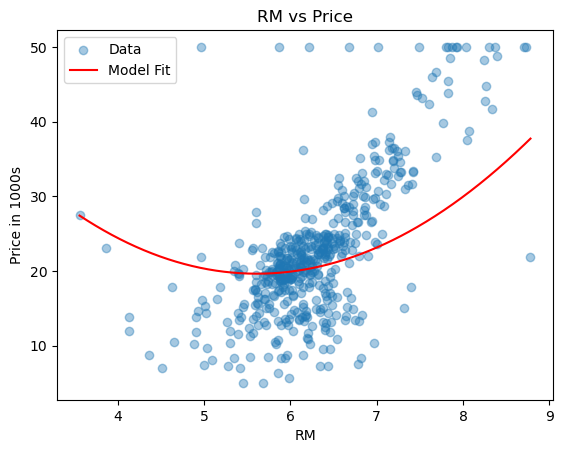

In [8]:
# plot a feature
feature_of_interest = 'RM'
model = est2

Xfit = make_plot_table(model, feature_of_interest)

yfit = model.predict(Xfit)

fig, ax = plt.subplots()
plt.scatter(housing[feature_of_interest], housing.PRICE, alpha=.4)
plt.plot(Xfit[feature_of_interest], yfit, c='r')
plt.xlabel(feature_of_interest)
plt.ylabel("Price in 1000s")
plt.title(f'{feature_of_interest} vs Price')
plt.legend(['Data', 'Model Fit'])

plt.show()

# this plot shows that the model isn't great for all features but the plots below are much better

## Exercise 2: Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **1.3**, but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [9]:
# exercise 2

def reg_plot_on_ax(feature, ax_loc):
    model = est2

    Xfit = make_plot_table(model, feature)
    yfit = model.predict(Xfit)
    
    ax_loc.scatter(housing[feature], housing.PRICE, alpha=.4)
    ax_loc.plot(Xfit[feature], yfit, c='r')
    ax_loc.set_xlabel(feature)
    ax_loc.set_ylabel("Price in 1000s")
    ax_loc.set_title(f'{feature} vs Price')
    ax_loc.legend(['Data', 'Model Fit'])
    return

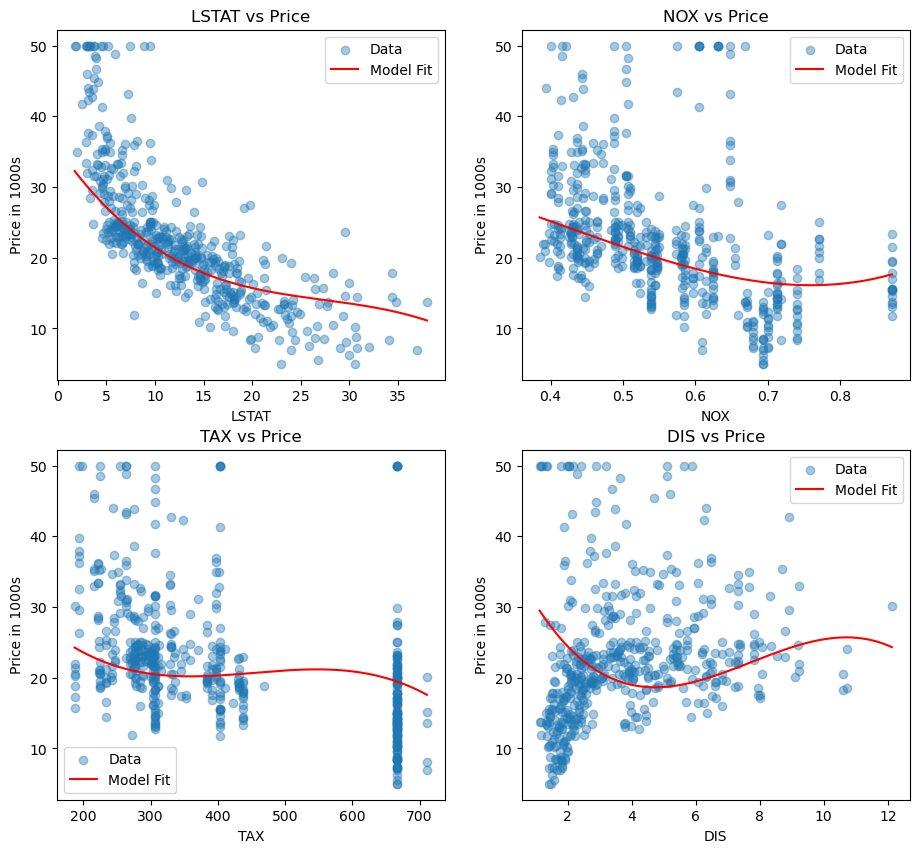

In [10]:
features = ['LSTAT', 'NOX', 'TAX', 'DIS']

feature_1 = features[0]
feature_2 = features[1]
feature_3 = features[2]
feature_4 = features[3]

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(11,10))

reg_plot_on_ax(feature_1, ax[0,0])
reg_plot_on_ax(feature_2, ax[0,1])
reg_plot_on_ax(feature_3, ax[1,0])
reg_plot_on_ax(feature_4, ax[1,1])

plt.show()

# these plots have decent fit for the features although DIS has some issues at the beginning